# Linear Regression
### Linear regression is a foundational supervised learning algorithm designed to predict continuous numerical outcomes by modeling the relationship between independent variables (features) and a dependent variable (target) as a linear equation. It assumes a straight-line relationship between inputs and outputs, making it highly effective when data exhibits strong linearity and independence among features. This simplicity enables quick implementation and interpretation, ideal for initial prototypes or scenarios with well-behaved data. However, its sensitivity to outliers and inability to capture non-linear patterns can limit its performance in complex datasets.

### Linear Regression as a baseline model to benchmark more advanced techniques, refining it based the use case.

| Aspect | Details |
| :- | :- |
| Use For           | Predicting continuous values (e.g., house prices, temperature forecasts)    |
| Key Assumptions   | - Strong linear relationship between features and target<br>- Independence of features<br>- No or minimal multicollinearity<br>- Normally distributed residuals |
| Advantages        | - Simple to implement and interpret<br>- Computationally efficient<br>- Provides interpretable coefficients |
| Disadvantages     | - Highly sensitive to outliers, skewing results<br>- Struggles with non-linear relationships<br>- Assumes constant variance (homoscedasticity) |
| Avoid When        | - Data lacks linear trends<br>- Presence of significant non-linear patterns<br>- Heavy multicollinearity or outliers dominate |
| Real-World Use Case | House price prediction (e.g., estimating values based on size, location, and age)<br>Stock price forecasting (with linear market trends) |

## Problem Description: 
### Predict house prices using the Kaggle dataset based on features like square footage, number of bedrooms, and location proXimity. This is a classic regression problem where Linear Regression can model the linear relationship between these features and price.

Using Kaggle dataset https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [3]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
from sklearn.pipeline import Pipeline 
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib 
import os

In [4]:
project_dir = './01_linear_regression'

# load training dataset
data = pd.read_csv(project_dir + '/data/train.csv')

In [5]:
# using all 36 numerical features - later could use categorical features as well
features = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

X = data[features] 
y = np.log1p(data['SalePrice'])  # log-transform target to handle skewness

# feature engineering: add Age and cap outliers.
X['Age'] = data['YrSold'] - data['YearBuilt'] 
X = X.replace([np.inf, -np.inf], np.nan) # Handle infinite values from division 
for column in X.columns: 
    if X[column].dtype in ['int64', 'float64']: 
        # cap at 99th percentile 
        q_high = X[column].quantile(0.99) 
        X[column] = X[column].clip(upper=q_high) 
        # Cap target outliers
        y = y.clip(upper=np.log1p(data['SalePrice'].quantile(0.99))) 
        

/tmp/ipykernel_257059/3562437200.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = data['YrSold'] - data['YearBuilt']


In [6]:
# fill missing values with mean - simplistic approach
# X = X.fillna(X.mean()) 
# y = y.fillna(y.mean())

# better approach would be to use SimpleImputer with median (robust to outliers) 
imputer = SimpleImputer(strategy='median') 
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns) # colums=features is no longer valid due to additional feautures added

# scale features to improve model performance and convergence
scaler = StandardScaler() 
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [7]:
# split the dataset into training (80%) and testing (20%) sets for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, shuffle=True)

Model1 - Linear Regression:
Mean Squared Error: 0.02
R-squared Score: 0.88


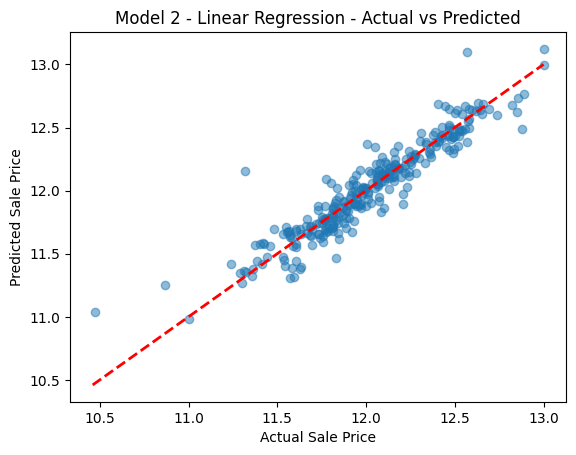

In [8]:
# model 1 is a Liner Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model2 on the test data
y_pred = model.predict(X_test)

# calculate evaluation metrics: Mean Squared Error (MSE) and R-squared (R²)
# MSE measures the average squared difference between actual and predicted values
# R² indicates the proportion of variance in the target explained by the model
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

print('Model1 - Linear Regression:')
print(f'Mean Squared Error: {mse:.2f}') 
print(f'R-squared Score: {r2:.2f}')


# create a scatter plot to visualize actual vs. predicted prices
plt.scatter(y_test, y_pred, alpha=0.5) 
plt.xlabel('Actual Sale Price') 
plt.ylabel('Predicted Sale Price') 
plt.title('Model 2 - Linear Regression - Actual vs Predicted')

# add a line for perfect predictions
# where predicted values equal actual values
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) 
plt.show()

Model 2 - Ridge Regression:
Mean Squared Error: 0.02
R-squared Score: 0.89


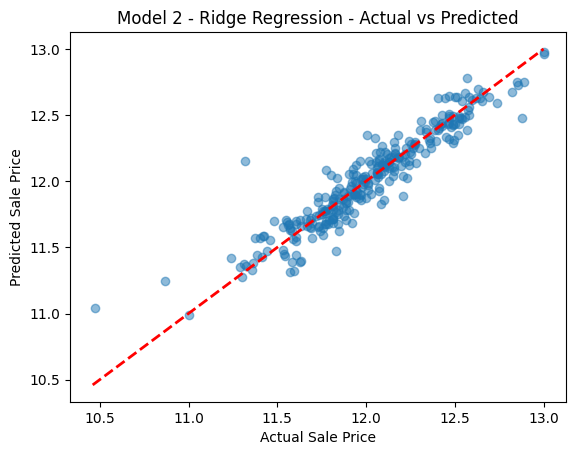

In [9]:
# model 2 is a Ridge Regression model
# ridge regression is a regularized version of Linear Regression that helps prevent overfitting
# it adds a penalty term to the loss function to control the complexity of the model
# this is particularly useful when dealing with multicollinearity or when the number of features is large
# train a Ridge Regression model (regularized version of Linear Regression) for better accuracy.
# alpha parameter controls regularization strength
model2 = Ridge(alpha=10.0) 
model2.fit(X_train, y_train)

# evaluate the model2 on the test data
y_pred = model2.predict(X_test)

# calculate evaluation metrics: Mean Squared Error (MSE) and R-squared (R²)
# MSE measures the average squared difference between actual and predicted values
# R² indicates the proportion of variance in the target explained by the model
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

print('Model 2 - Ridge Regression:')
print(f'Mean Squared Error: {mse:.2f}') 
print(f'R-squared Score: {r2:.2f}')


# create a scatter plot to visualize actual vs. predicted prices
plt.scatter(y_test, y_pred, alpha=0.5) 
plt.xlabel('Actual Sale Price') 
plt.ylabel('Predicted Sale Price') 
plt.title('Model 2 - Ridge Regression - Actual vs Predicted')

# add a line for perfect predictions
# where predicted values equal actual values
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) 
plt.show()

In [10]:
# save the trained model2 to a file using joblib for later use
model_dir = project_dir + '/model' 
os.makedirs(model_dir, exist_ok=True) 
model_filename = os.path.join(model_dir, 'house_price_model.pkl') 
joblib.dump(model2, model_filename) 
print(f'Model saved as {model_filename}')

Model saved as ./01_linear_regression/model/house_price_model.pkl


Saved Model 2 - Ridge Regression:
Mean Squared Error: 0.02
R-squared Score: 0.89


/tmp/ipykernel_257059/2551693467.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = data['YrSold'] - data['YearBuilt']


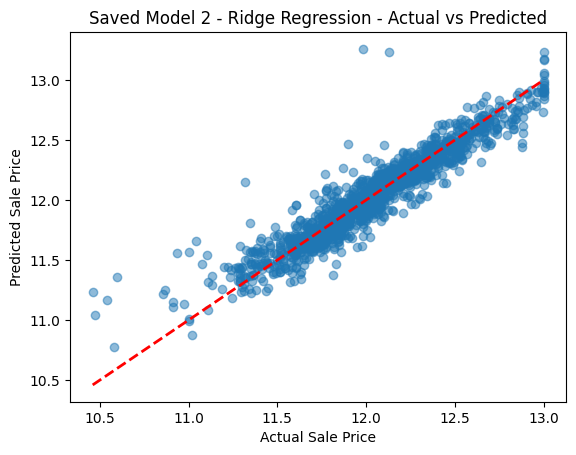

In [11]:
# load the model from the file
loaded_model = joblib.load(model_filename)

# load and preprocess test.csv.
test_data = pd.read_csv(project_dir + '/data/test.csv') 

X = data[features] 
y = np.log1p(data['SalePrice'])  # Log-transform target to handle skewness

# feature engineering: add Age and cap outliers.
X['Age'] = data['YrSold'] - data['YearBuilt'] 
X = X.replace([np.inf, -np.inf], np.nan) # Handle infinite values from division 
for column in X.columns: 
    if X[column].dtype in ['int64', 'float64']: 
        # cap at 99th percentile 
        q_high = X[column].quantile(0.99) 
        X[column] = X[column].clip(upper=q_high) 
        # Cap target outliers
        y = y.clip(upper=np.log1p(data['SalePrice'].quantile(0.99))) 

# impute missing values with the same imputer fitted on training data
X = pd.DataFrame(imputer.transform(X), columns=X.columns)


# scale features to improve model performance and convergence
scaler = StandardScaler() 
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# evaluate the loaded model on the test data
y_pred = loaded_model.predict(X)

# calculate evaluation metrics: Mean Squared Error (MSE) and R-squared (R²)
# MSE measures the average squared difference between actual and predicted values
# R² indicates the proportion of variance in the target eXplained by the model
mse = mean_squared_error(y, y_pred) 
r2 = r2_score(y, y_pred) 

print('Saved Model 2 - Ridge Regression:')
print(f'Mean Squared Error: {mse:.2f}') 
print(f'R-squared Score: {r2:.2f}')


# create a scatter plot to visualize actual vs. predicted prices
plt.scatter(y, y_pred, alpha=0.5) 
plt.xlabel('Actual Sale Price') 
plt.ylabel('Predicted Sale Price') 
plt.title('Saved Model 2 - Ridge Regression - Actual vs Predicted')

# add a line for perfect predictions
# where predicted values equal actual values
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) 
plt.show()